In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('diabetes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Cleaning Dataset

In [2]:
#  --- check for nulls ----
print('Nulls')
print('=====')
print(df.isnull().sum())

Nulls
=====
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [3]:
# ---- check for 0s ----
print('0s')
print('======')
print(df.eq(0).sum())

0s
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [9]:
# --- replace all 0s with NaNs ----

# df[['Glucose','BloodPressure','SkinThickness',
#     'Insulin','BMI','DiabetesPedigreeFunction','Age']] = \
#     df[['Glucose','BloodPressure','SkinThickness',
#         'Insulin','BMI','DiabetesPedigreeFunction','Age']].replace
# (0,np.NaN)

(0, nan)

In [10]:
# --- replace all nans with their median ----

df.fillna(df.median(), inplace=True)


## Examine the correlation

In [4]:
corr = df.corr()
print(corr)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

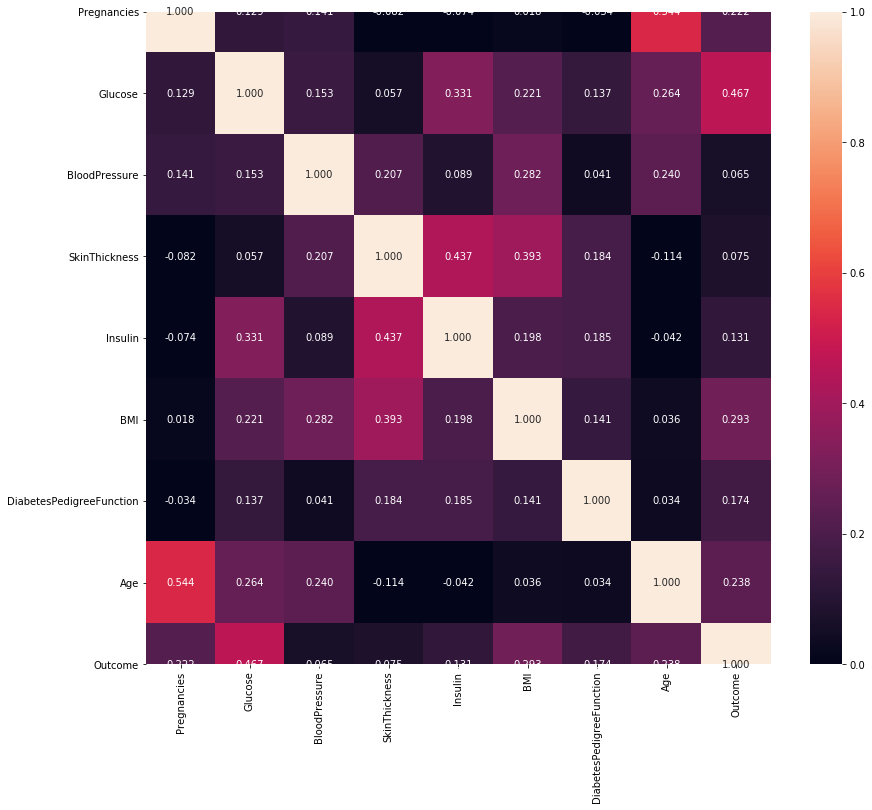

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.figure(figsize=(14,12))

sns.heatmap(corr,annot=True,fmt='.3f',vmin=0,vmax=1)


## Logistic Regression

In [12]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

#  --- features---
X = df[['Glucose', 'BMI', 'Age']]

y = df.iloc[:, 8]

log_reg = linear_model.LogisticRegression()
log_reg_score = cross_val_score(log_reg, X, y, cv=10, scoring='accuracy').mean()

c:\users\abuton\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\abuton\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\abuton\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\abuton\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\abuton\appdata\local\programs\python\python37\l

In [13]:
result = []
result.append(log_reg_score)

## K-Nearest Neighbors

In [18]:
from sklearn.neighbors import KNeighborsClassifier
cv_scores = []
# --- number of folds ---
folds = 10
#---creating odd list of K for KNN--
ks = list(range(1,int(len(X) * ((folds - 1)/folds)), 2))
#---perform k-fold cross validation--
for k in ks:
    
    knn = KNeighborsClassifier(n_neighbors=k)

    score = cross_val_score(knn, X, y, cv=folds, scoring='accuracy').mean()

    cv_scores.append(score)
#---get the maximum score--
knn_score = max(cv_scores)
#---find the optimal k that gives the highest score--
optimal_k = ks[cv_scores.index(knn_score)]
print(f"The optimal number of neighbors is {optimal_k}")
print(knn_score)
result.append(knn_score)

The optimal number of neighbors is 19
0.7669514695830485


## SVM 

In [20]:
from sklearn import svm
linear_svm = svm.SVC(kernel='linear')
linear_svm_score = cross_val_score(linear_svm, X, y, cv=10, scoring='accuracy').mean()
print(linear_svm_score)
result.append(linear_svm_score)

0.7630724538619276


In [21]:
# Using the RBF kernel

rbf_svm = svm.SVC(kernel='rbf')
rbf_svm_score = cross_val_score(rbf_svm, X, y, cv=10, scoring='accuracy').mean()
print(rbf_svm_score)
result.append(rbf_svm_score)

c:\users\abuton\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\abuton\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\abuton\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", Futu

0.6327751196172249


c:\users\abuton\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



## RandomForest 

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=400)
rf_clf_score = cross_val_score(rf_clf, X, y, cv=10, scoring='accuracy').mean()
print(rf_clf_score)
result.append(rf_clf_score)

0.7330314422419686



## GradientBoosting

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
gf_clf = GradientBoostingClassifier(n_estimators=400,learning_rate=0.01)
gf_clf_score = cross_val_score(gf_clf, X, y, cv=10, scoring='accuracy').mean()
print(gf_clf_score)
result.append(gf_clf_score)

0.7656185919343814


## Selecting the best Algorithm

In [26]:
algorithms = ["Logistic Regression", "K Nearest Neighbors", "SVM Linear Kernel", "SVM RBF Kernel",
              'RandomForestClassifier', 'GradientBoostingClassifier']
cv_mean = pd.DataFrame(result, index = algorithms)
cv_mean.columns=["Accuracy"]
cv_mean.sort_values(by="Accuracy", ascending=False)

,Accuracy
K Nearest Neighbors,0.766951
GradientBoostingClassifier,0.765619
Logistic Regression,0.764405
SVM Linear Kernel,0.763072
RandomForestClassifier,0.733031
SVM RBF Kernel,0.632775


In [27]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')

# Save Model

In [28]:
import pickle
# --- Save the model to disc ---
filename = 'diebetes.sav'
#  --- write to file using the binary mode ---
pickle.dump(knn, open(filename, 'wb'))

In [29]:
# --- load the model ---
loaded_model = pickle.load(open('diebetes.sav', 'rb'))

In [31]:
glucose = 65
BMI = 70
Age = 50

prediction = loaded_model.predict([[glucose, BMI, Age]])
print(prediction)
if prediction == 0:
    print('Non-Diebetic')
else:
    print('Diebetic')

[0]
Non-Diebetic


In [32]:
proba = loaded_model.predict_proba([[glucose, BMI, Age]])
print(proba)
print("Confidence: "+ str(round(np.amax(proba[0]) * 100, 2)) + '%')

[[0.94736842 0.05263158]]
Confidence: 94.74%
